In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
id <- "1K1gNOxeiYrkQlw_hhni3Xjuwgen_0ZAE" # google drive file ID #
sleep_data = read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id)) # Google drive export link #
sleep_data

sr,rr,t,lm,bo,rem,sr.1,hr,sl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [4]:
# url <- "https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep/download"
# sleep_data <- read_csv (url, skip = )
# sleep_data

In [5]:
sleep_data_mutated <- mutate(sleep_data, sl = as_factor(sl))
sleep_data_mutated

sr,rr,t,lm,bo,rem,sr.1,hr,sl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [6]:
selected_coloumns <- select(sleep_data_mutated, sr.1, hr, rr, t, sl)        
selected_coloumns

sr.1,hr,rr,t,sl
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.840,74.20,25.680,91.840,3
1.552,72.76,25.104,91.552,3
7.000,60.00,20.000,96.000,1
⋮,⋮,⋮,⋮,⋮
0.000,78.76,27.504,86.880,4
6.728,59.32,19.728,95.728,1
4.088,63.48,21.392,93.392,2


In [7]:
sleep_data_sliced <- slice(selected_coloumns, 1:200)
sleep_data_sliced

sr.1,hr,rr,t,sl
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.840,74.20,25.680,91.840,3
1.552,72.76,25.104,91.552,3
7.000,60.00,20.000,96.000,1
⋮,⋮,⋮,⋮,⋮
8.456,53.64,17.456,98.184,0
3.104,61.84,20.736,92.736,2
1.168,70.84,24.336,91.168,3


In [8]:
sleep_split <- initial_split(sleep_data_sliced, prop = 0.75, strata = sl)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)
sleep_train
sleep_test

,sr.1,hr,rr,t,sl
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.840,74.20,25.680,91.840,3
4,0.768,68.84,23.536,90.768,3
5,8.248,53.12,17.248,97.872,0
⋮,⋮,⋮,⋮,⋮,⋮
198,8.456,53.64,17.456,98.184,0
199,3.104,61.84,20.736,92.736,2
200,1.168,70.84,24.336,91.168,3


,sr.1,hr,rr,t,sl
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1.552,72.76,25.104,91.552,3
3,7.000,60.00,20.000,96.000,1
9,7.112,50.28,16.112,96.168,0
⋮,⋮,⋮,⋮,⋮,⋮
184,6.648,59.12,19.648,95.648,1
185,7.480,51.20,16.480,96.720,0
194,1.120,70.60,24.240,91.120,3


In [9]:
sleep_data_aggregate <- sleep_train %>%
summarize(across(sr.1:t, mean, na.rm = TRUE))
sleep_data_aggregate

sr.1,hr,rr,t
<dbl>,<dbl>,<dbl>,<dbl>
3.854641,64.29098,21.71639,92.8262


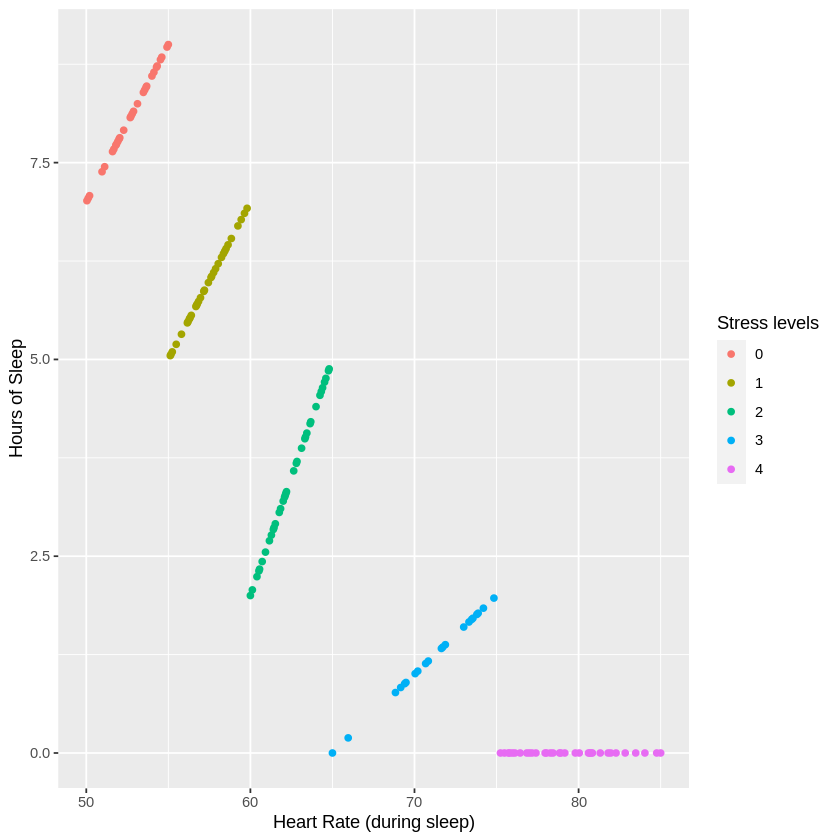

In [10]:
sleep_train_plot <- ggplot(sleep_train, aes( x = hr, y = sr.1, color = sl)) +
geom_point() +
labs(x = "Heart Rate (during sleep)", y = "Hours of Sleep", color = "Stress levels")
sleep_train_plot

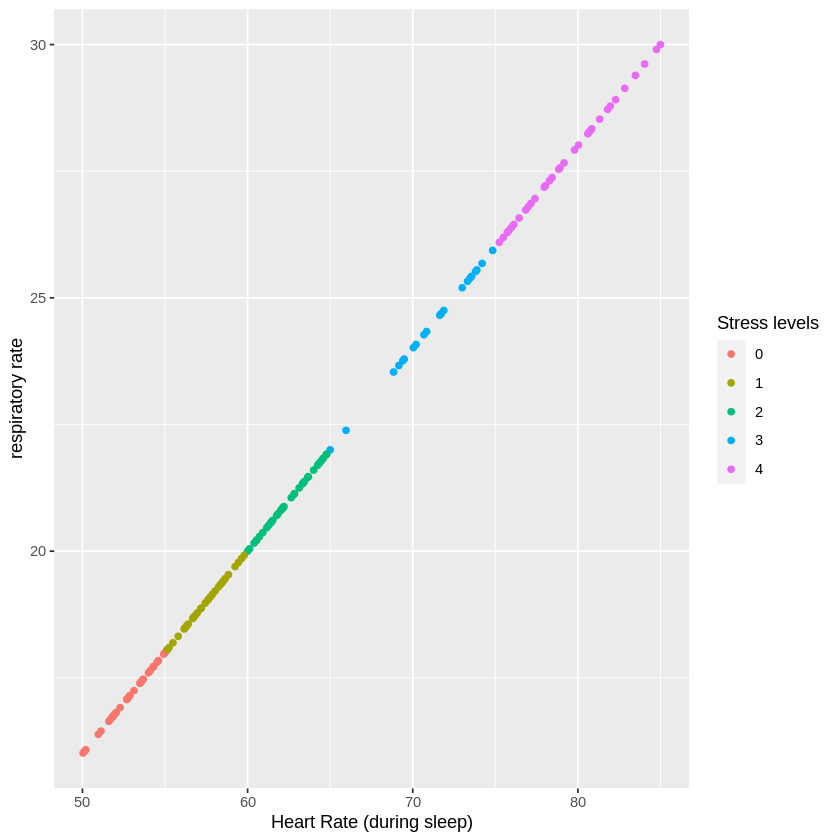

In [11]:
sleep_train_plot <- ggplot(sleep_train, aes( x = hr, y = rr, color = sl)) +
geom_point() +
labs(x = "Heart Rate (during sleep)", y = "respiratory rate", color = "Stress levels")
sleep_train_plot

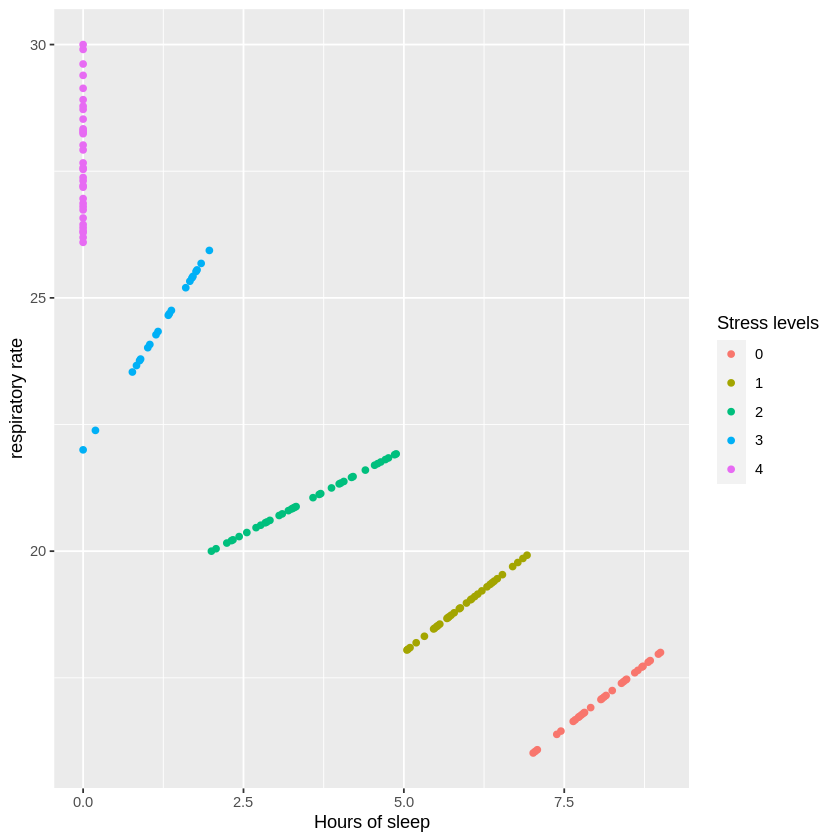

In [12]:
sleep_train_plot <- ggplot(sleep_train, aes( x = sr.1, y = rr, color = sl)) +
geom_point() +
labs(x = "Hours of sleep", y = "respiratory rate", color = "Stress levels")
sleep_train_plot

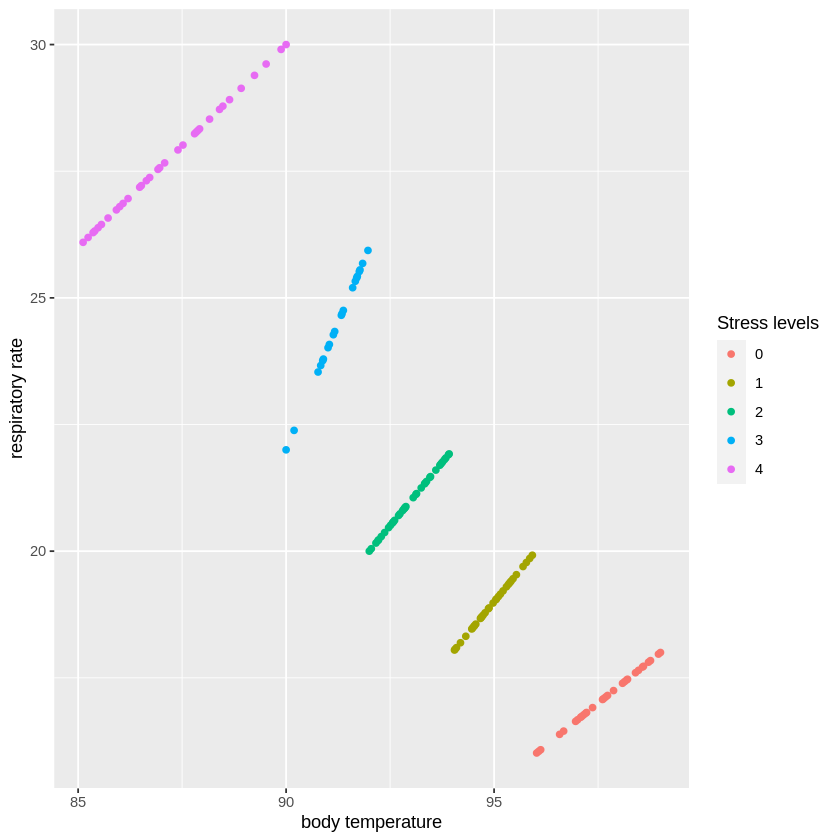

In [13]:
sleep_train_plot <- ggplot(sleep_train, aes( x = t, y = rr, color = sl)) +
geom_point() +
labs(x = "body temperature", y = "respiratory rate", color = "Stress levels")
sleep_train_plot